# Projet Machine Learning : Prédiction de la Réponse à une Campagne Marketing

Ce projet vise à construire un modèle de régression logistique pour prédire si un client répondra à une campagne marketing en se basant sur ses données personnelles, ses habitudes d'achat, et ses caractéristiques socio-économiques.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Chargement et Exploration des Données

Nous chargeons le dataset, examinons sa structure et identifions les éventuelles valeurs manquantes ou incohérences.


In [3]:
 #📥 Chargement des données
df = pd.read_csv("marketing_campaign.csv", sep=";")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## 2. Nettoyage et Feature Engineering

Création de nouvelles variables pertinentes (âge, nombre d'enfants, dépenses totales) et suppression des colonnes inutiles.


In [4]:
# 🧹 Nettoyage & Feature Engineering
df = df.dropna(subset=["Income"])

In [5]:
print("\n📊 Basic Information:")
print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())


📊 Basic Information:

Dataset Shape: (2216, 29)

Missing Values:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [6]:
df["Age"] = 2024 - df["Year_Birth"]

In [7]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [8]:
df["TotalSpent"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)

In [ ]:
# ❌ Suppression des colonnes inutiles,
df = df.drop(columns=["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue"])

## 3. Prétraitement pour la Modélisation

Encodage des variables catégorielles et normalisation des données pour rendre le modèle plus performant.


In [10]:
#Each variable is converted in as many 0/1 variables as there are different values.
# 🔤 Encodage des variables catégorielles
df = pd.get_dummies(df, drop_first=True)

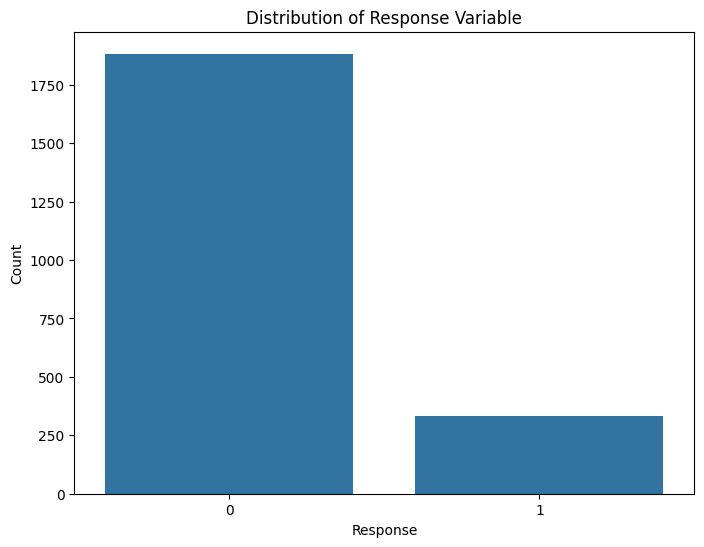

In [6]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Response')
plt.title('Distribution of Response Variable')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

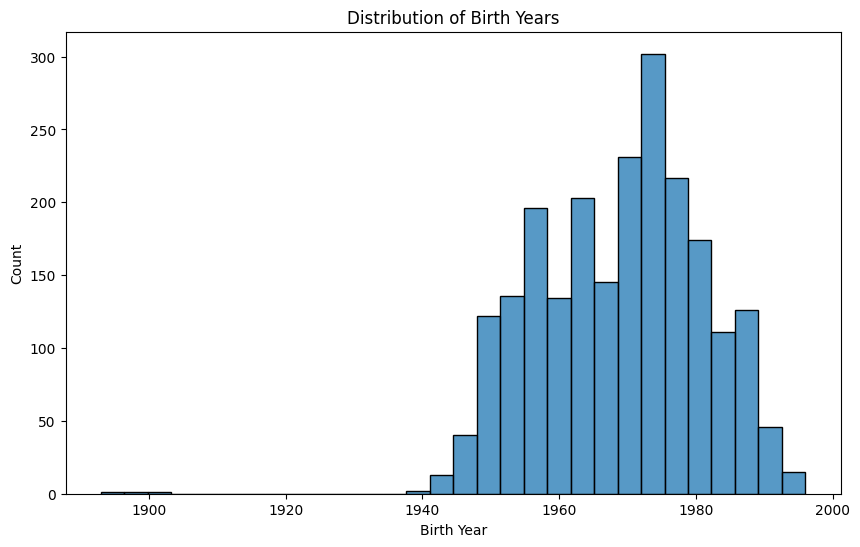

In [7]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year_Birth', bins=30)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

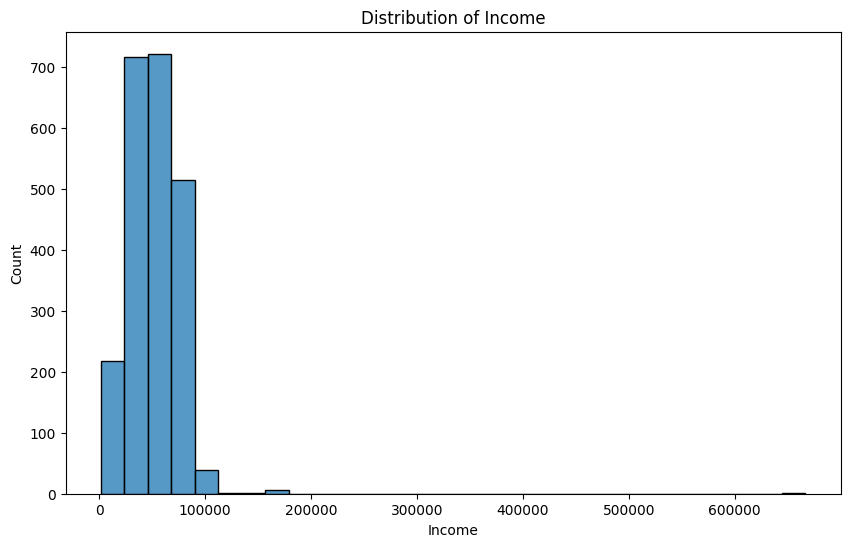

In [8]:
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

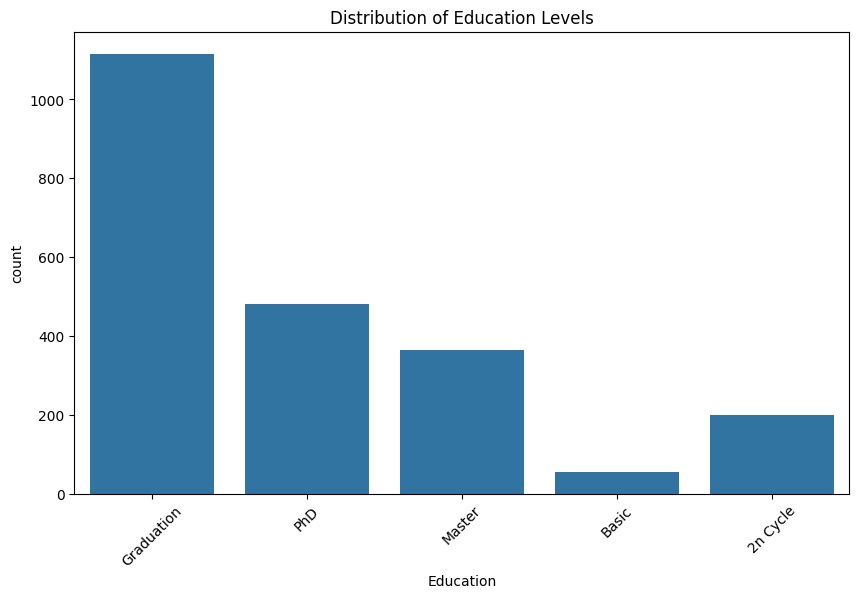

In [9]:
# Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)
plt.show()

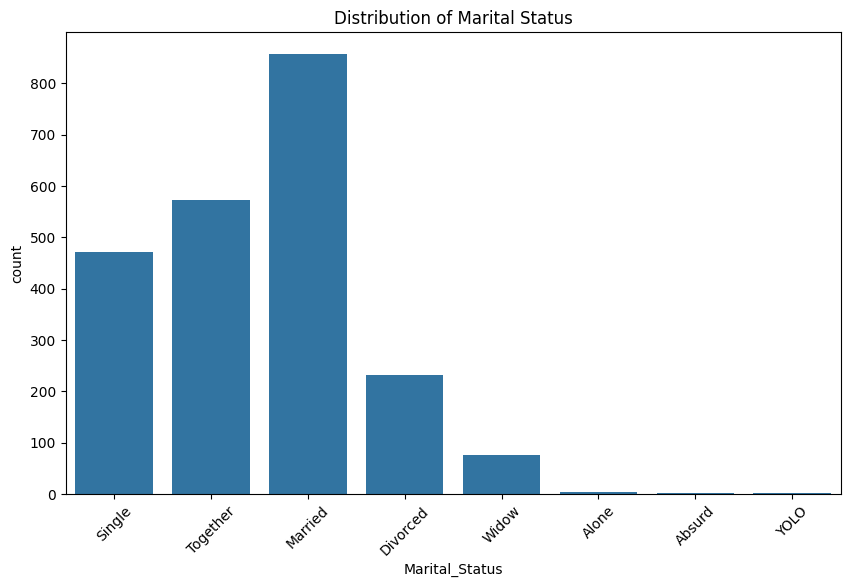

In [10]:
# Marital Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)
plt.show()

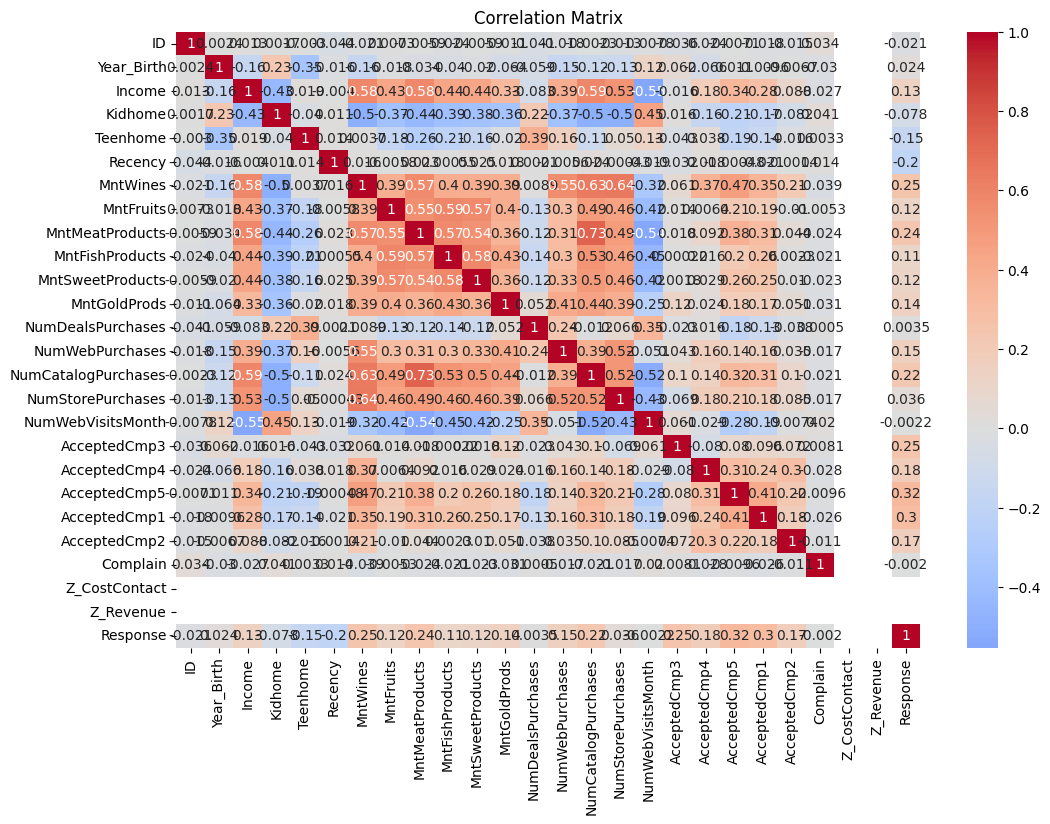

In [12]:
# Correlation Analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Summary Statistics
print("\n📈 Summary Statistics:")
print(df.describe())


📈 Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     

## 4. Modélisation : Régression Logistique

Nous utilisons un modèle de régression logistique pour prédire la variable cible `Response`, puis évaluons ses performances.


In [11]:
# 🎯 Données pour le modèle
X = df.drop("Response", axis=1)
y = df["Response"]

In [12]:
# 🔧 Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# 🧪 Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

In [14]:
# 🤖 Régression Logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 5. Évaluation du Modèle

Matrice de confusion et rapport de classification pour analyser la qualité des prédictions (précision, rappel, F1-score).


In [15]:
# 📊 Résultats
print("📈 Rapport de classification :\n", classification_report(y_test, y_pred))

📈 Rapport de classification :
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       565
           1       0.67      0.40      0.50       100

    accuracy                           0.88       665
   macro avg       0.78      0.68      0.72       665
weighted avg       0.87      0.88      0.87       665



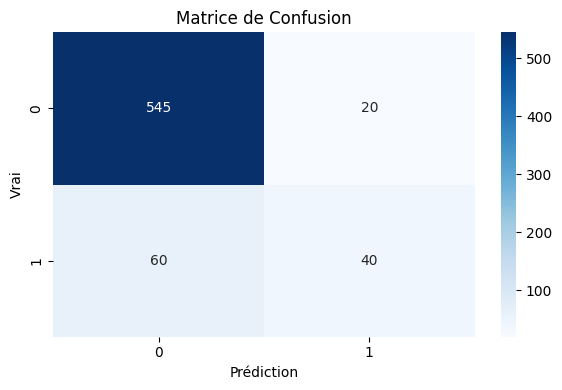

In [16]:
# 🔥 Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédiction")
plt.ylabel("Vrai")
plt.tight_layout()
plt.show()

## 6. Recommandations Marketing

Les résultats suggèrent que :
- Les clients avec un revenu plus élevé et des dépenses importantes sont plus susceptibles de répondre positivement.
- Les campagnes futures peuvent cibler ces segments pour maximiser le retour sur investissement.


## ✅ Conclusion

Le modèle de régression logistique s'avère utile pour prédire les réponses aux campagnes marketing avec une bonne précision.  
Les insights extraits permettent de mieux orienter les décisions stratégiques et les campagnes ciblées.
